In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Namrata.Paikekar\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Namrata.Paikekar\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_csv("data\\train.csv")
test_df = pd.read_csv("data\\test.csv")

In [4]:
train_df.head(3)

,case_title,case_text,case_outcome
0,Re Lamb; Ex parte Registrar in Bankruptcy (198...,The following exchange took place on the first...,cited
1,Ogle v Strickland (1987) 13 FCR 306,"Fourth, the respondent's submissions concernin...",cited
2,Walton v Gardiner [1993] HCA 77 ; (1993) 177 C...,"First, in my opinion, to relitigate the events...",applied


In [5]:
test_df.head(3)

,case_title,case_text
0,Air Great Lakes Pty Ltd v K S Easter (Holdings...,In Air Great Lakes Pty Ltd v K S Easter (Holdi...
1,Tepperova v Minister for Immigration and Multi...,Section 31A commenced operation on 1 December ...
2,Re Minister for Immigration &amp; Multicultura...,His Honour was clearly correct to say that fin...


In [6]:
# viewing sample data
train_df['case_text'][11]

"Minister relied on remarks of McHugh J in Re Minister for Immigration and Multicultural Affairs Ex parte Durairajasingham [2000] HCA 1 ; (2000) 74 ALJR 405 (and in particular I apprehend at 412-413 [35]-[36] and 416-418 [60]-[70]) that in effect the Tribunal in stating its reasons for decision was entitled to make findings of fact and was not required to go through line by line each item of evidence, or each relevant matter and deal with it in turn, accepting or dismissing it. So much may be accepted. The Minister also argued that the decision required under s 65 of the Migration Act 1958 (Cth) ('the Act') was whether or not the Tribunal, standing in the shoes of the Minister as the decision-maker, was satisfied of the matters set out in the Regulations for the purposes of granting the visa for which the appellant applied. She contended that findings along the way were not ones which went to jurisdiction. I am of opinion that it was not open to the Tribunal, on the basis only of the f

In [8]:
# checking shape if training and test dataset
print(f"shape of training data: {train_df.shape}")
print(f"shape of testing data: {test_df.shape}")

shape of training data: (19988, 3)
shape of testing data: (4997, 2)


In [12]:
# check missing records 

train_df.isnull().sum()

case_title        0
case_text       145
case_outcome      0
dtype: int64

In [13]:
test_df.isnull().sum()

case_title     0
case_text     31
dtype: int64

In [14]:
# remove the missing data from both the datasets
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [15]:
train_df.dtypes

case_title      object
case_text       object
case_outcome    object
dtype: object

In [16]:
test_df.dtypes

case_title    object
case_text     object
dtype: object

In [17]:
# checking the stats of the data
train_df.describe()

,case_title,case_text,case_outcome
count,19843,19843,19843
unique,15254,15004,10
top,Minister for Immigration and Ethnic Affairs v ...,"noted above, Comandate Marine's proceedings in...",cited
freq,55,32,9684


In [18]:
test_df.describe()

,case_title,case_text
count,4966,4966
unique,4409,4524
top,Minister for Immigration and Ethnic Affairs v ...,submitted that this Court should hold that the...
freq,15,11


In [19]:
# cheking the distribution of labels

train_df['case_outcome'].value_counts()

case_outcome
cited            9684
referred to      3491
applied          1951
followed         1802
considered       1359
discussed         813
distinguished     483
related            89
approved           87
affirmed           84
Name: count, dtype: int64

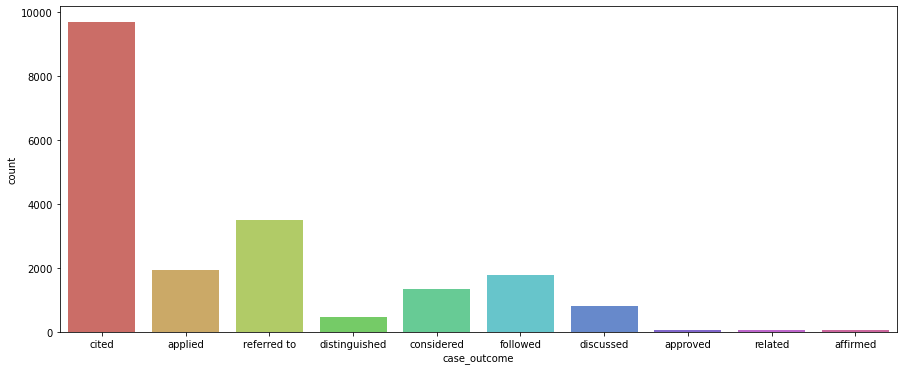

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(train_df['case_outcome'], data=train_df, palette='hls')
plt.show()

In [21]:
# function for basic preprocessing 

import string
import nltk
from nltk.stem import WordNetLemmatizer

#store the stopwords in english language in a variable
stopwords = nltk.corpus.stopwords.words('english')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()    # lowercasing all the test to remove duplicacy in tokens
    text = text.strip()    # removing empty spaces in the text data
    text = "".join([i for i in text if i not in string.punctuation])    # remove the punctuations in the data
    output = " ".join(word for word in text.split() if word.lower() not in stopwords) # removing the stopwords like a, an the, of etc
    lemm_text = " ".join([lemmatizer.lemmatize(word) for word in output.split()])
    
    return lemm_text

# apply function to textual columns
train_df['case_text'] = train_df['case_text'].apply(lambda x:clean_text(x))

In [23]:
train_df['case_text'][10]

'shaw v minister immigration multicultural affair 2003 hca 72 2003 218 clr 28 gleeson cj gummow hayne jj heydon j agreeing 87 190 said 352 footnote omitted power conferred 51xix support legislation determining attributed status alien parliament may make law impose upon status burden obligation disqualification parliament could impose upon person hand law respect naturalisation parliament may remove status absolutely upon condition way citizenship may seen obverse status alienage'

In [26]:
# Extract words using the same regex (flatten the list of words)
import re

flat_words = [word for row in train_df['case_text'].apply(lambda x: re.findall(r'\b[a-zA-Z0-9]+\b', str(x).lower())) for word in row]

# Count word frequencies using Counter
word_counts = Counter(flat_words)

# Print the word counts
print(word_counts)

Counter({'v': 69045, 'court': 46249, 'ltd': 36017, 'j': 32839, 'act': 27036, 'case': 27024, 'pty': 25012, 'applicant': 24390, 'tribunal': 22083, 'decision': 20308, 'would': 20043, 'may': 18793, 'made': 18286, 'order': 18000, 'evidence': 17150, 'fca': 17095, 'mr': 16746, 'hca': 16714, 'per': 16526, 'clr': 16419, 'whether': 16193, 'proceeding': 16087, 'party': 15893, 'application': 15243, 'claim': 14844, 'see': 14788, 'respondent': 14779, 'matter': 14238, 'australia': 13823, 'said': 13513, 'reason': 13447, 'law': 13259, 'fcr': 13092, 'question': 12747, 'minister': 12680, 'fact': 12443, 'also': 11913, 'appellant': 11487, 'person': 11246, 'appeal': 11171, 'purpose': 10882, 'issue': 10713, '1': 10700, 'must': 10538, 'upon': 10507, '2006': 10493, 'circumstance': 10492, 'relevant': 10464, 'one': 10277, '2': 9970, 'federal': 9535, 'conduct': 9520, 'cost': 9339, 'honour': 9002, 'judgment': 8958, 'australian': 8811, 'particular': 8757, 'time': 8731, 'immigration': 8655, '2005': 8565, 'amp': 8364

In [27]:
train_df.head(5)

,case_title,case_text,case_outcome
0,Re Lamb; Ex parte Registrar in Bankruptcy (198...,following exchange took place first three day ...,cited
1,Ogle v Strickland (1987) 13 FCR 306,fourth respondent submission concerning issue ...,cited
2,Walton v Gardiner [1993] HCA 77 ; (1993) 177 C...,first opinion relitigate event 27 march 2006 a...,applied
3,Stack &amp; Anor v Elster Metering Pty Ltd &am...,stack gst made application high court special ...,cited
4,Grant v Downs [1976] HCA 63 ; (1976) 135 CLR 674,great disagreement counsel principle applied m...,applied


#### Text encoding 

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Tokenize the text
tokenizer = Tokenizer(num_words=50000)  # Limit vocabulary size to 50,000 words
tokenizer.fit_on_texts(train_df['case_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(train_df['case_text'])

# Step 2: Padding sequences to ensure uniform length
max_sequence_length = 250  # You can adjust this based on your data
x = pad_sequences(sequences, maxlen=max_sequence_length)

# Example: Model input shape and tokenized data check
print("Tokenized and padded shape:", x.shape)

Tokenized and padded shape: (19843, 250)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=50000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(10, activation='softmax'))  # For multiclass classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
5. Text Encoding for BERT Model
For BERT, we need to use a BERT tokenizer to encode the text. Here, we'll use Hugging Face's Transformers library for tokenization and prepare the text for input to a BERT model.

python
Copy
from transformers import BertTokenizer

# Step 1: Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Step 2: Tokenize text and encode with BERT tokenizer
encoded_inputs = tokenizer(
    list(train_df['cleaned_case_text']),
    padding=True,
    truncation=True,
    return_tensors='pt',  # Return as PyTorch tensors
    max_length=128  # Set max sequence length
)

# Extract input IDs and attention masks (BERT's required input format)
input_ids = encoded_inputs['input_ids']
attention_mask = encoded_inputs['attention_mask']

# Check tokenized data
print(input_ids.shape)
print(attention_mask.shape)
6. Text Encoding for RoBERTa Model
Similar to BERT, for RoBERTa, we also use the Transformers library but load the RoBERTa tokenizer.

python
Copy
from transformers import RobertaTokenizer

# Step 1: Load pre-trained RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Step 2: Tokenize and encode with RoBERTa tokenizer
encoded_inputs_roberta = tokenizer(
    list(train_df['cleaned_case_text']),
    padding=True,
    truncation=True,
    return_tensors='pt',  # Return as PyTorch tensors
    max_length=128  # Set max sequence length
)

# Extract input IDs and attention masks for RoBERTa
input_ids_roberta = encoded_inputs_roberta['input_ids']
attention_mask_roberta = encoded_inputs_roberta['attention_mask']

# Check tokenized data
print(input_ids_roberta.shape)
print(attention_mask_roberta.shape)
7. Model Implementation (LSTM, BERT, and RoBERTa)
LSTM Model Example:
python
Copy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()
BERT Model Example:
python
Copy
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained BERT model for classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments for fine-tuning BERT
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Set up Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df,  # Your dataset here
    eval_dataset=train_df   # Your validation set here
)

# Start fine-tuning
trainer.train()
RoBERTa Model Example:
python
Copy
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained RoBERTa model for classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Define training arguments for fine-tuning RoBERTa
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Set up Trainer for RoBERTa
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df,  # Your dataset here
    eval_dataset=train_df   # Your validation set here
)

# Start fine-tuning
trainer.train()
Summary of Steps:
Preprocessing: Lowercasing, removing punctuation, stopwords, and lemmatization using spaCy.
Tokenization:
For LSTM: Tokenize using Keras Tokenizer and pad sequences.
For BERT and RoBERTa: Tokenize using Transformers library's pre-trained tokenizers.
Model Implementation: Use LSTM for simple RNN-based models and BERT/RoBERTa for transformer-based models.
Training: Fine-tune models using the Trainer API from Hugging Face.
This should cover preprocessing, tokenization, and setting up models for both LSTM and Transformer architectures 
like BERT and RoBERTa. You can now train and test your models with your dataset. 
Let me know if you need further clarification or adjustments!